## Notebook for the Epithelial Reference Map preparation with Geosketch

- **Developed by**: Anna Maguza
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- 29th May 2023

### Import required moduls

In [1]:
import scanpy as sc

In [2]:
import numpy as np
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from geosketch import gs

In [3]:
from matplotlib import axes
from matplotlib import pylab

#### Setup Cells

In [4]:
%matplotlib inline

In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi = 160, color_map = 'magma_r', dpi_save = 300, vector_friendly = True)

/Users/anna.maguza/miniconda3/envs/geosketch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.8


### Upload data

In [6]:
input = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/all_cells/Healthy_epithelial_cells_all_genes.h5ad'
Healthy_adata = sc.read_h5ad(input)

### Step 1 - create a proportion graph for cell types

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Enterocyte'),
  Text(1, 0, 'TA'),
  Text(2, 0, 'Stem cells'),
  Text(3, 0, 'Goblet cells'),
  Text(4, 0, 'Colonocyte'),
  Text(5, 0, 'Paneth cells'),
  Text(6, 0, 'Tuft cells'),
  Text(7, 0, 'Epithelial cells'),
  Text(8, 0, 'Microfold cell'),
  Text(9, 0, 'Enteroendocrine cells'),
  Text(10, 0, 'L cells'),
  Text(11, 0, 'Enterochromaffin cells')])

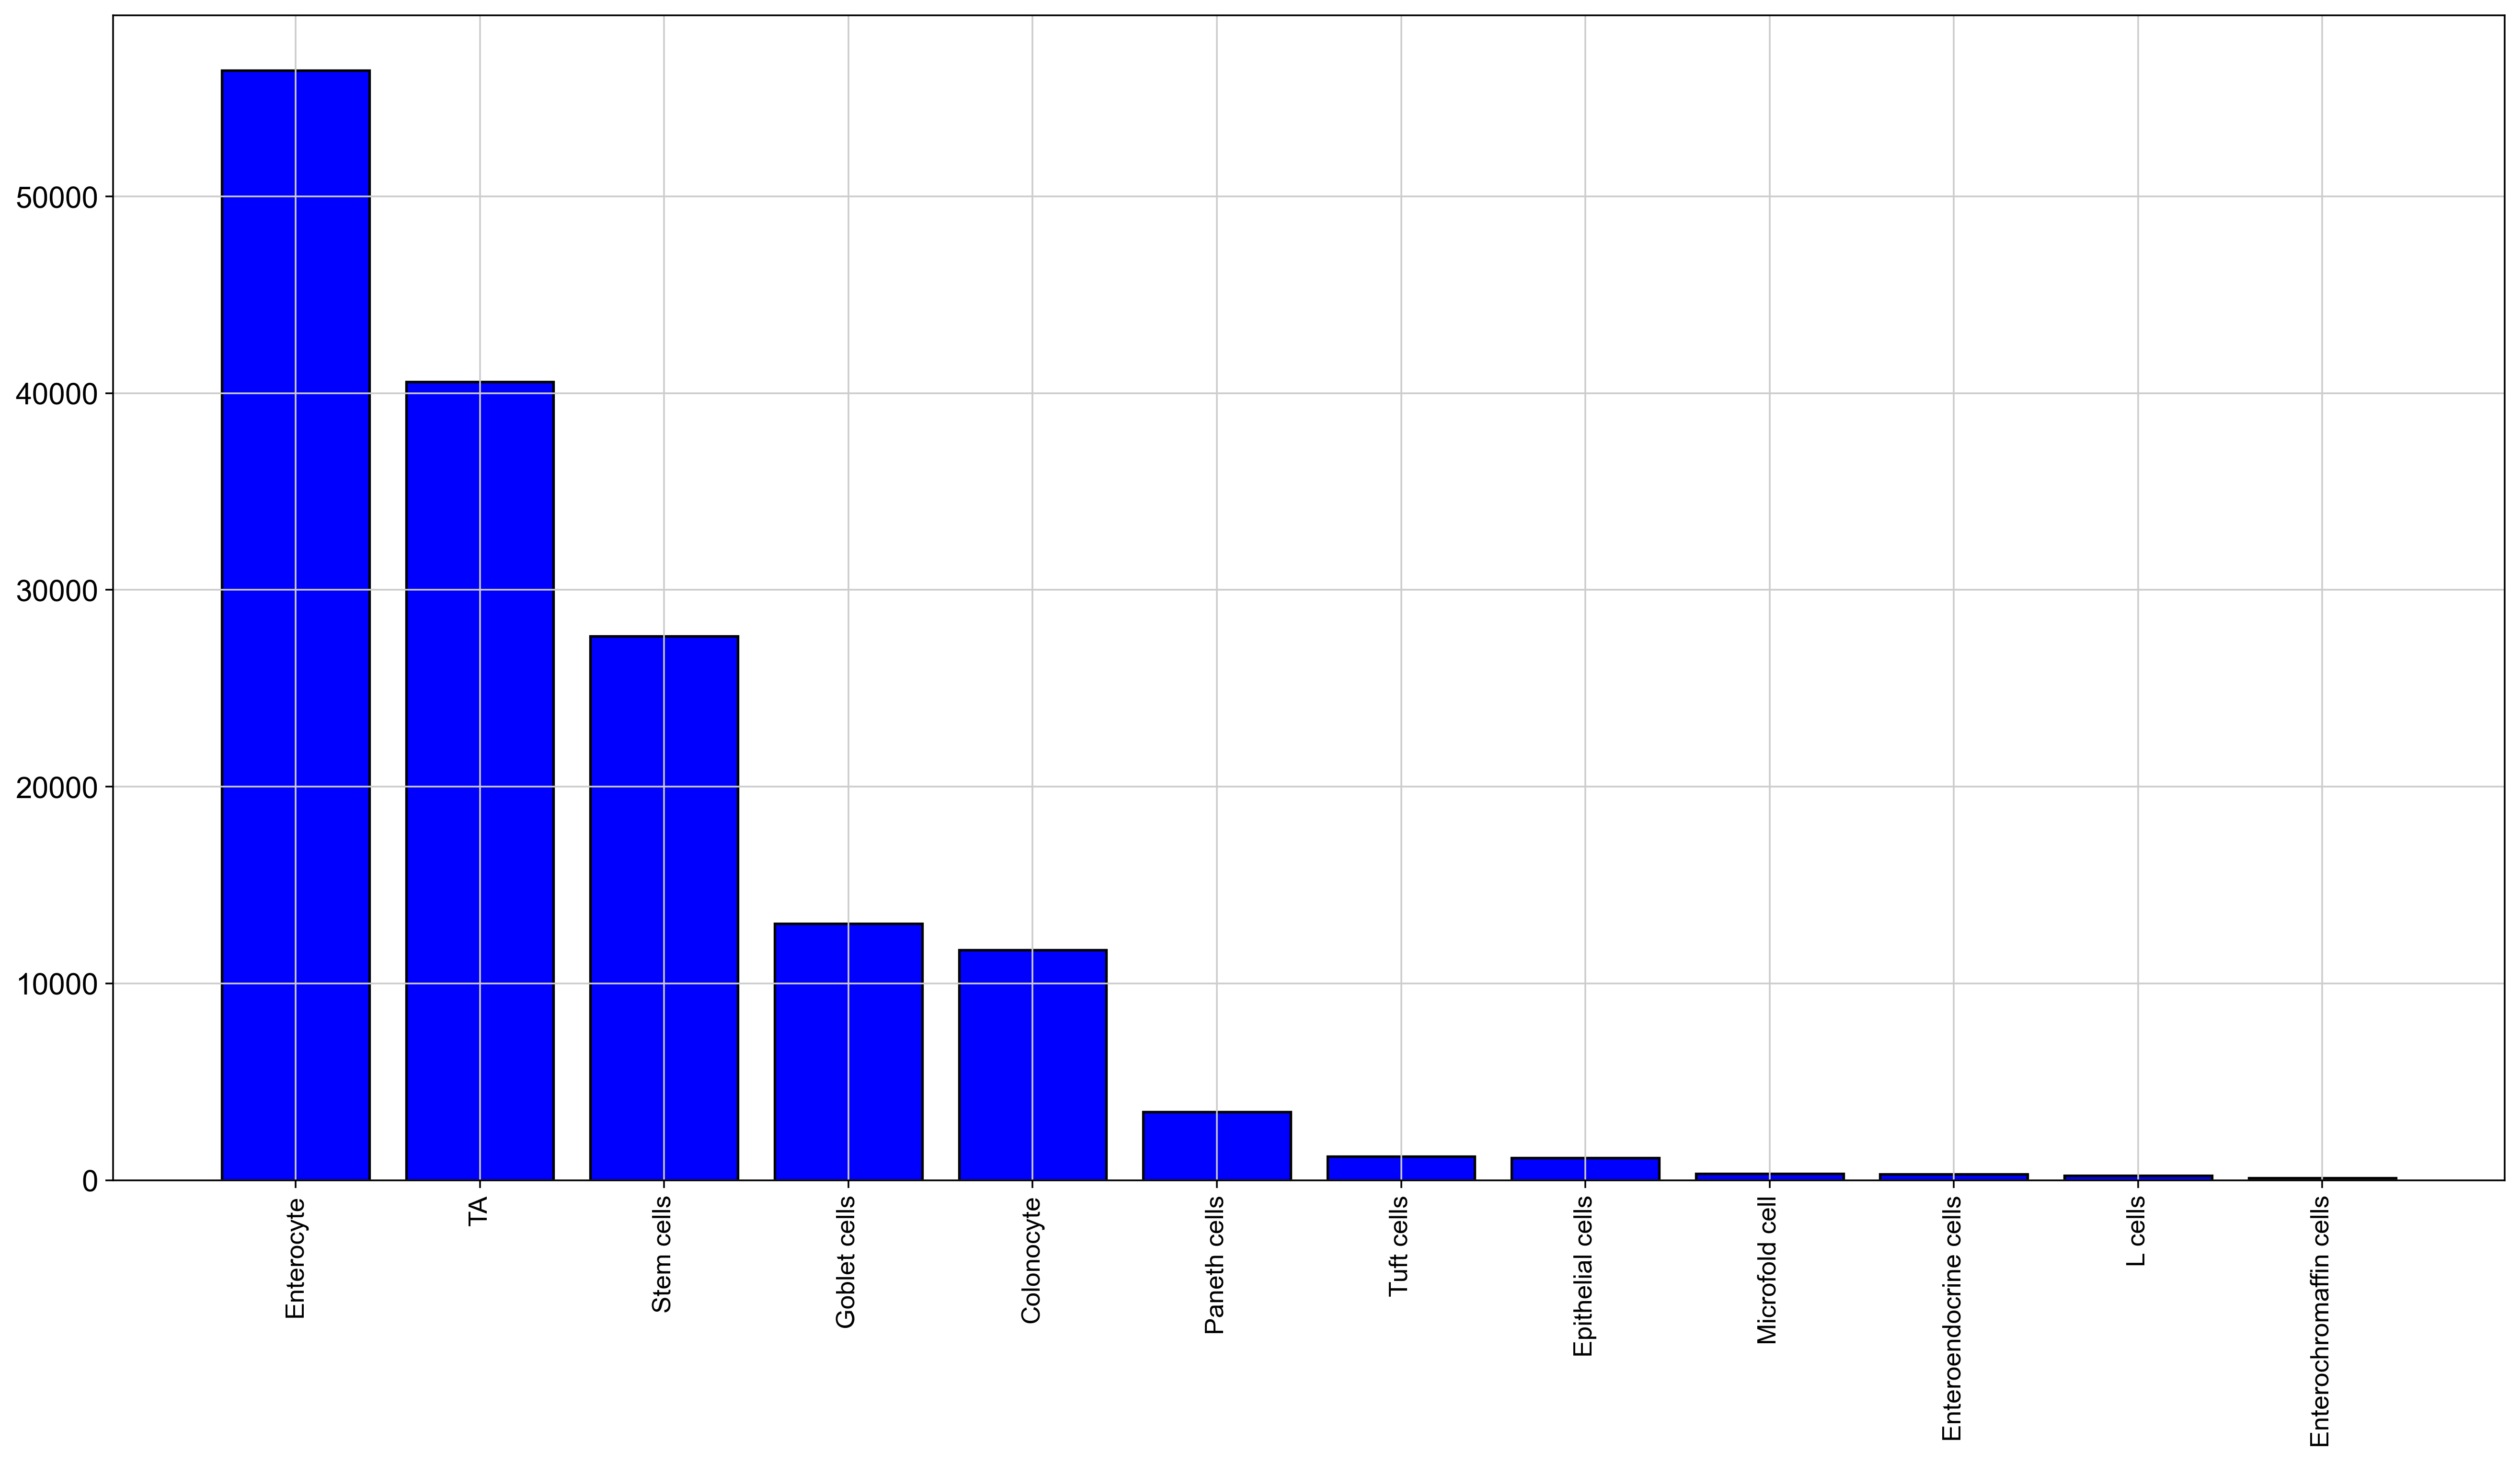

In [7]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(Healthy_adata.obs["Unified Cell States"].value_counts().index, Healthy_adata.obs["Unified Cell States"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [10]:
Healthy_adata.obs["Unified Cell States"].value_counts()

Enterocyte                56398
TA                        40570
Stem cells                27658
Goblet cells              13051
Colonocyte                11707
Paneth cells               3468
Tuft cells                 1204
Epithelial cells           1141
Microfold cell              340
Enteroendocrine cells       311
L cells                     228
Enterochromaffin cells      119
Name: Unified Cell States, dtype: int64

### Subset data with `geosketch`

In [8]:
#Extract the most abumdant cell states
TA = Healthy_adata[Healthy_adata.obs["Unified Cell States"].isin(['TA']), :]
Enterocyte = Healthy_adata[Healthy_adata.obs["Unified Cell States"].isin(['Enterocyte']), :]
Colonocyte = Healthy_adata[Healthy_adata.obs["Unified Cell States"].isin(['Colonocyte']), :]
Stem = Healthy_adata[Healthy_adata.obs["Unified Cell States"].isin(['Stem cells']), :]
Goblet = Healthy_adata[Healthy_adata.obs["Unified Cell States"].isin(['Goblet cells']), :]

In [9]:
sc.pp.pca(TA)
sc.pp.pca(Enterocyte)
sc.pp.pca(Colonocyte)
sc.pp.pca(Stem)
sc.pp.pca(Goblet)

computing PCA
    with n_comps=50
    finished (0:00:18)
computing PCA
    with n_comps=50
    finished (0:00:26)
computing PCA
    with n_comps=50
    finished (0:00:08)
computing PCA
    with n_comps=50
    finished (0:00:12)
computing PCA
    with n_comps=50
    finished (0:00:10)


In [11]:
N = 5500
N1 = 5500
N2 = 5000
N3 = 4500
N4 = 4500
sketch_index_TA = gs(TA.obsm['X_pca'], N1, replace = False)
sketch_index_Enterocyte = gs(Enterocyte.obsm['X_pca'], N, replace = False)
sketch_index_Colonocyte = gs(Colonocyte.obsm['X_pca'], N4, replace = False)
sketch_index_Stem = gs(Stem.obsm['X_pca'], N2, replace = False)
sketch_index_Goblet = gs(Goblet.obsm['X_pca'], N3, replace = False)

In [12]:
#Subset cells according to the sketch index
subset_TA = TA[TA.obs_names[sketch_index_TA]]
subset_Enterocyte = Enterocyte[Enterocyte.obs_names[sketch_index_Enterocyte]]
subset_Colonocyte = Colonocyte[Colonocyte.obs_names[sketch_index_Colonocyte]]
subset_Stem = Stem[Stem.obs_names[sketch_index_Stem]]
subset_Goblet = Goblet[Goblet.obs_names[sketch_index_Goblet]]

In [13]:
# Drop TA, Enterocyte and Plasma cells from the anndata_adult object
Healthy_adata = Healthy_adata[~Healthy_adata.obs['Unified Cell States'].isin(['TA', 'Enterocyte', 'Colonocyte', 'Stem cells', 'Goblet cells']), :]

In [14]:
# Concatenate the subset of TA, Enterocyte and Colonocyte cells with the epithelial_cells_subset
Healthy_adata = ad.concat([Healthy_adata, subset_TA, subset_Enterocyte, subset_Colonocyte, subset_Stem, subset_Goblet])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Enterocyte'),
  Text(2, 0, 'Stem cells'),
  Text(3, 0, 'Colonocyte'),
  Text(4, 0, 'Goblet cells'),
  Text(5, 0, 'Paneth cells'),
  Text(6, 0, 'Tuft cells'),
  Text(7, 0, 'Epithelial cells'),
  Text(8, 0, 'Microfold cell'),
  Text(9, 0, 'Enteroendocrine cells'),
  Text(10, 0, 'L cells'),
  Text(11, 0, 'Enterochromaffin cells')])

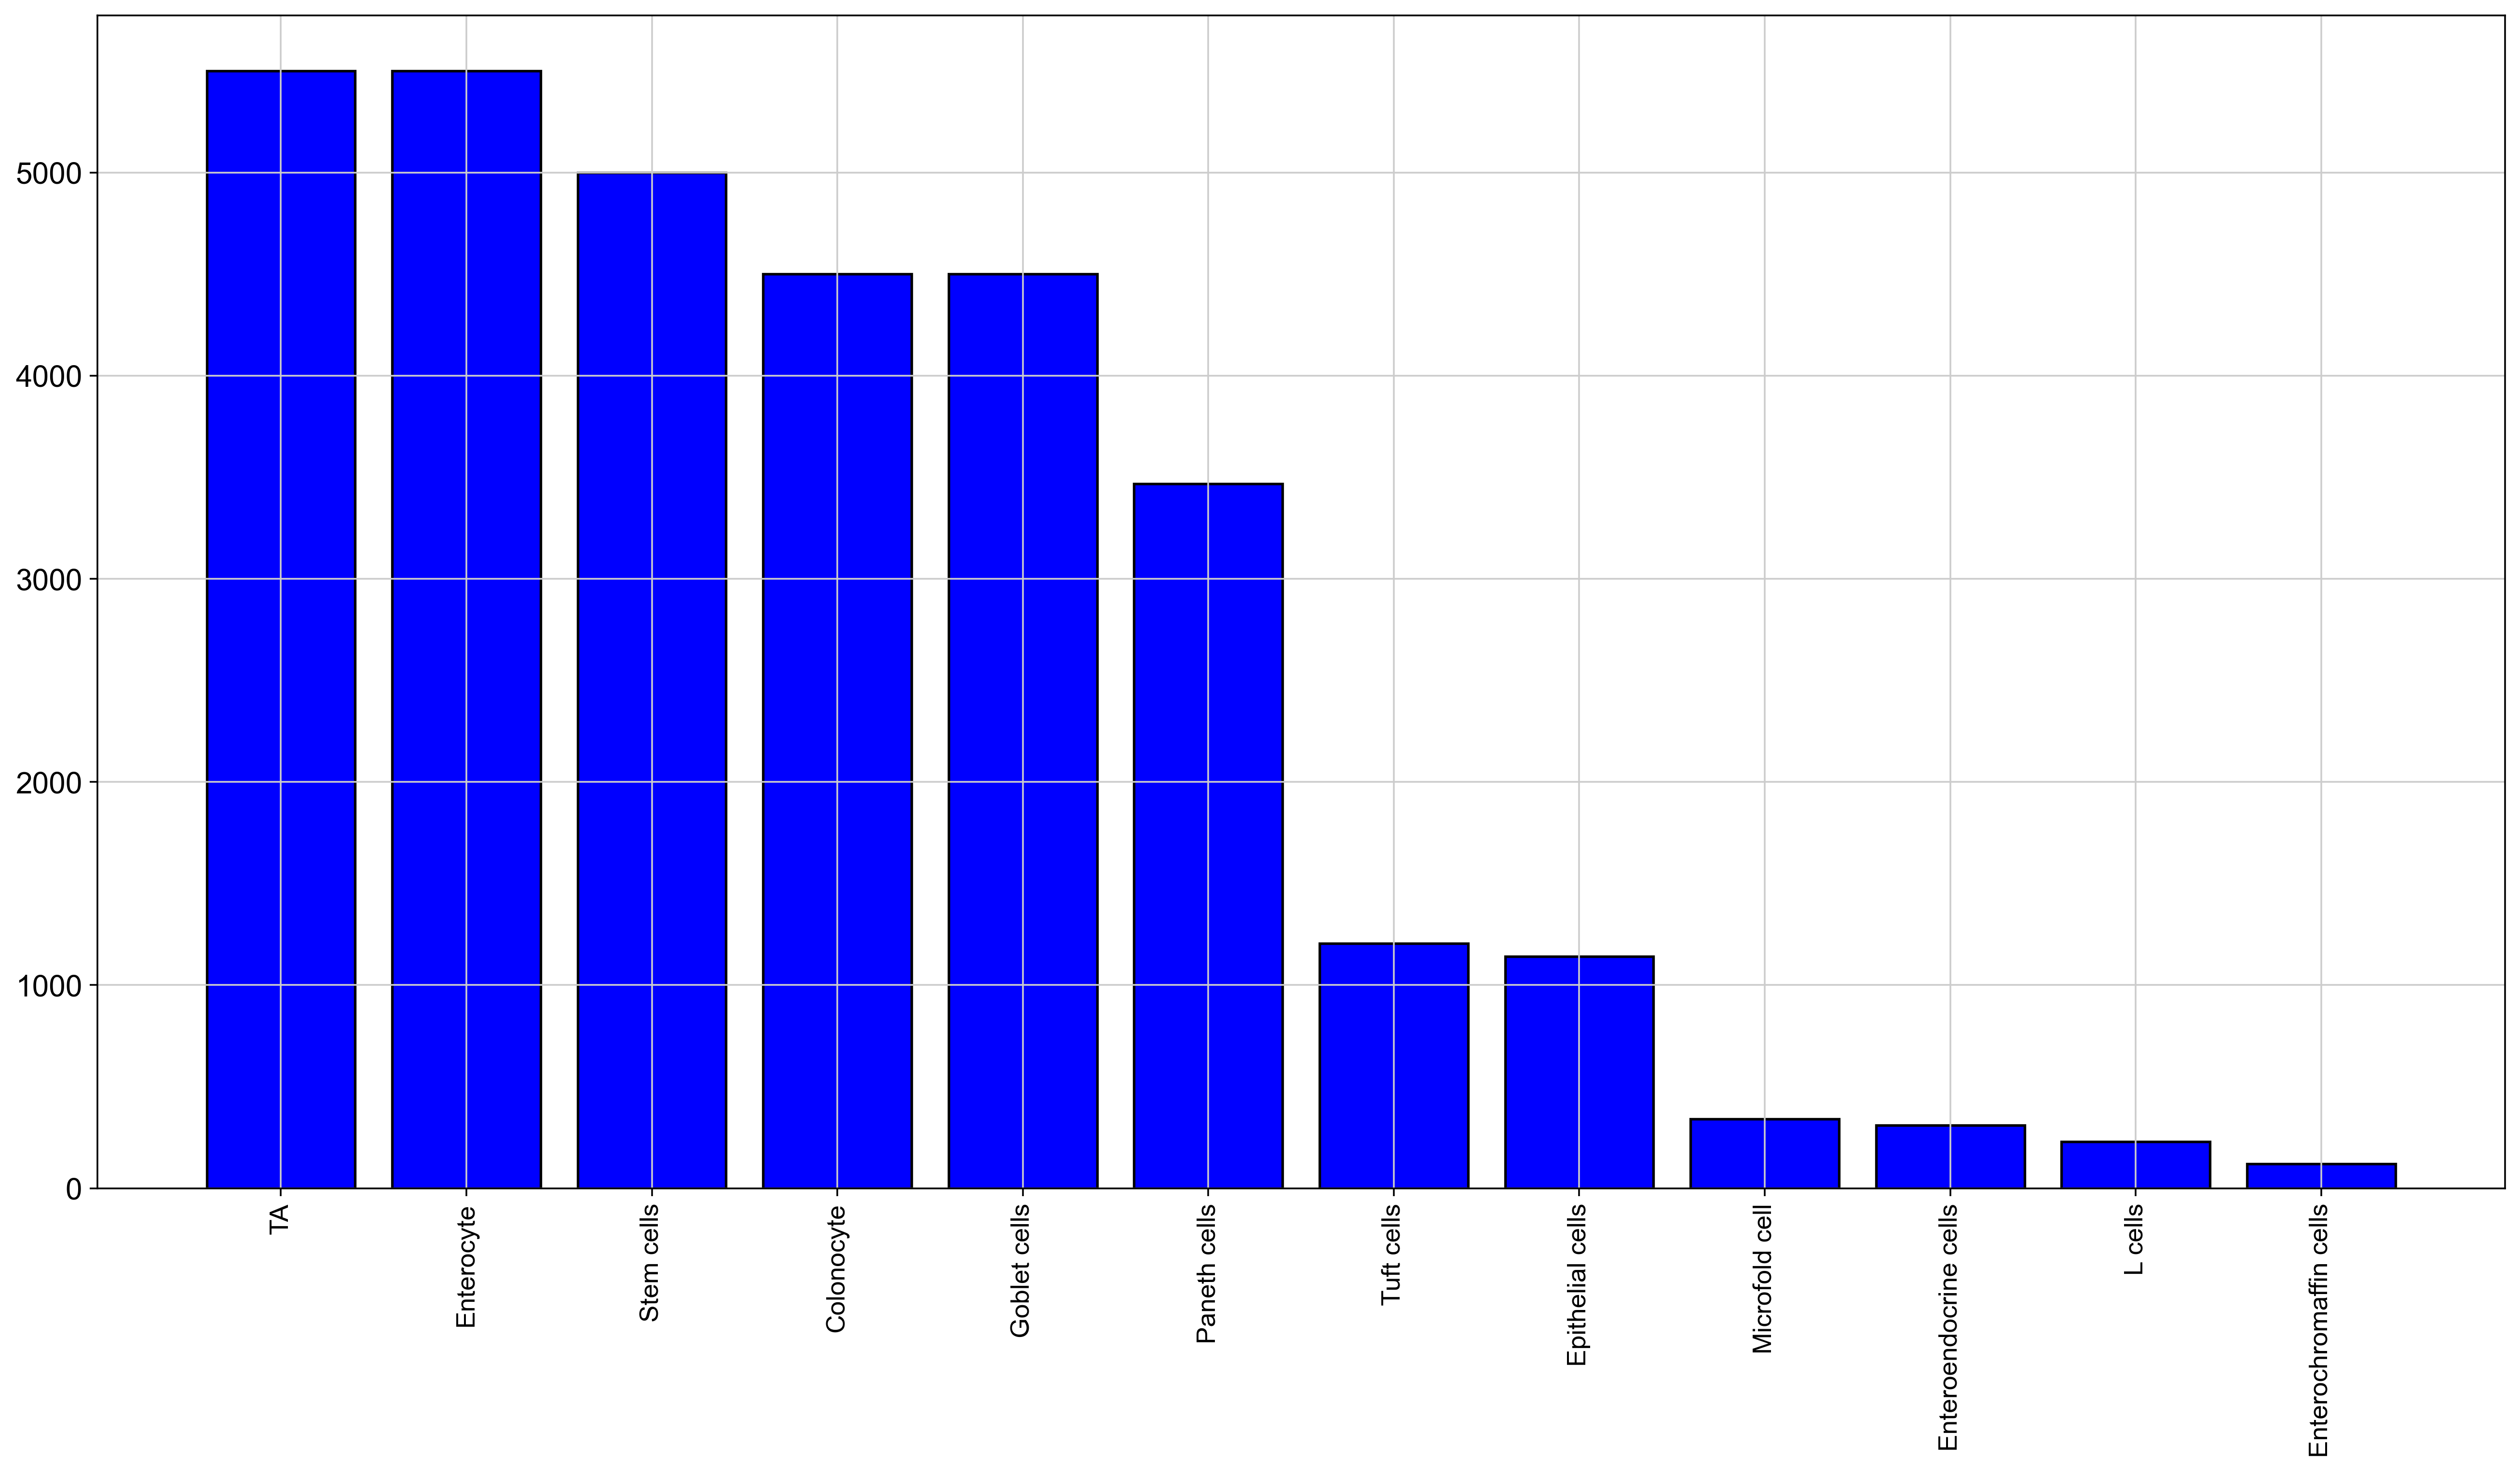

In [15]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(Healthy_adata.obs["Unified Cell States"].value_counts().index, Healthy_adata.obs["Unified Cell States"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [17]:
Healthy_adata.obs["Unified Cell States"].value_counts()

Enterocyte                5500
TA                        5500
Stem cells                5000
Colonocyte                4500
Goblet cells              4500
Paneth cells              3468
Tuft cells                1204
Epithelial cells          1141
Microfold cell             340
Enteroendocrine cells      311
L cells                    228
Enterochromaffin cells     119
Name: Unified Cell States, dtype: int64

In [16]:
#Save the anndata_subset object - local machine path
Healthy_adata.write('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/Epithelial_cells/Geosketch_subset/Epithelial_cells_Geosketch_subset_all_genes.h5ad')